In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

sns.set_style('darkgrid')

In [23]:
# importing data
df = pd.read_csv('csv_files/new_kc_house_data_clean_with_dummies2.csv')
df = df.drop(['Unnamed: 0','id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21420 non-null  float64
 1   bedrooms         21420 non-null  int64  
 2   bathrooms        21420 non-null  float64
 3   sqft_living      21420 non-null  int64  
 4   sqft_lot         21420 non-null  int64  
 5   sqft_above       21420 non-null  int64  
 6   yr_built         21420 non-null  int64  
 7   zipcode          21420 non-null  int64  
 8   lat              21420 non-null  float64
 9   long             21420 non-null  float64
 10  sqft_living15    21420 non-null  int64  
 11  sqft_lot15       21420 non-null  int64  
 12  waterfront_N     21420 non-null  int64  
 13  waterfront_Y     21420 non-null  int64  
 14  not_renovated    21420 non-null  int64  
 15  is_renovated     21420 non-null  int64  
 16  floors_1         21420 non-null  int64  
 17  floors_2    

In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1791.170215,71.092997,35.124416,47.560197,-122.213784,...,0.004715,0.191036,0.316200,0.272969,0.219795,0.001307,0.007563,0.648926,0.263445,0.078758
std,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,828.692965,29.387141,19.236257,0.138589,0.140791,...,0.068507,0.393127,0.465003,0.445496,0.414117,0.036132,0.086638,0.477317,0.440512,0.269367
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,0.000000,0.000000,47.155900,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1200.000000,52.000000,21.000000,47.471200,-122.328000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1560.000000,75.000000,34.000000,47.572100,-122.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2220.000000,97.000000,51.000000,47.678100,-122.125000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,115.000000,69.000000,47.777600,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


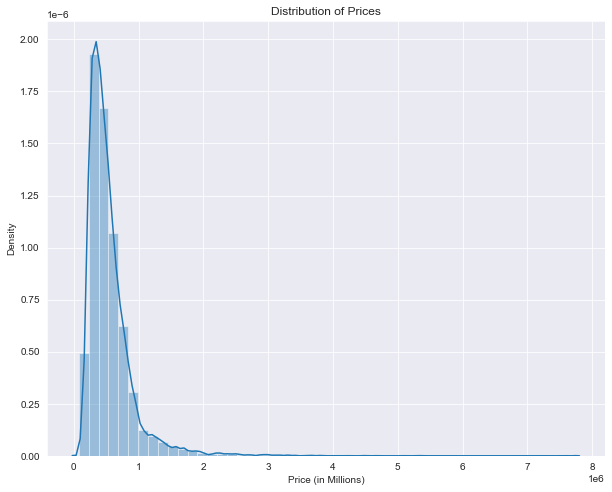

In [22]:
# checking normality of 'price'
fig = plt.figure(figsize=(10, 8))
sns.distplot(df['price'])
plt.title('Distribution of Prices')
plt.xlabel('Price (in Millions)')
plt.ylabel('Density')
plt.show();


Target variable is heavily skewed. Explore relationship of homes above $2 million 

In [19]:
above_2mil = df[df['price'] > 2000000]
above_2mil.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
count,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.000000,198.000000,198.000000,198.000000
mean,2.776364e+06,4.358586,3.862374,5054.338384,22761.297980,4027.388889,71.510101,29.444444,47.620033,-122.240929,...,0.227273,0.181818,0.338384,0.272727,0.207071,0.0,0.005051,0.611111,0.232323,0.151515
std,8.444762e+05,0.986046,1.092922,1564.112305,40021.220413,1320.755766,35.510739,20.368545,0.049555,0.084339,...,0.420132,0.386672,0.474359,0.446491,0.406234,0.0,0.071067,0.488734,0.423385,0.359459
min,2.010000e+06,2.000000,1.750000,3000.000000,3452.000000,1830.000000,4.000000,3.000000,47.416900,-122.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.250000e+06,4.000000,3.250000,4082.500000,10044.250000,3117.500000,39.000000,7.000000,47.588800,-122.286750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,4.000000,3.750000,4695.000000,16031.500000,3805.000000,84.000000,25.000000,47.626350,-122.233000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
75%,3.000000e+06,5.000000,4.500000,5505.000000,22591.500000,4570.000000,102.750000,48.000000,47.639200,-122.210000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,7.700000e+06,8.000000,8.000000,13540.000000,453895.000000,9410.000000,114.000000,69.000000,47.761200,-121.982000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


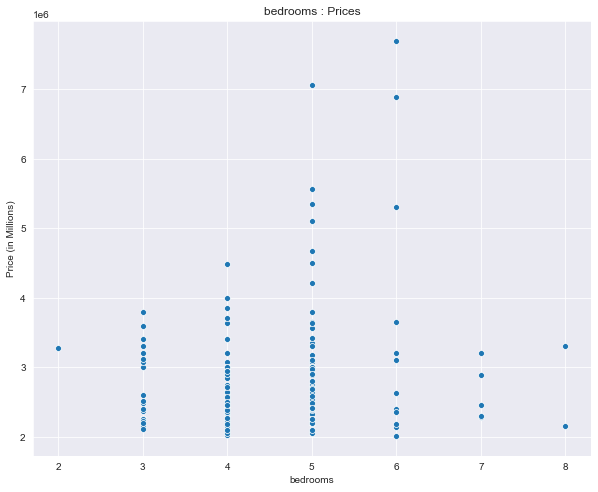

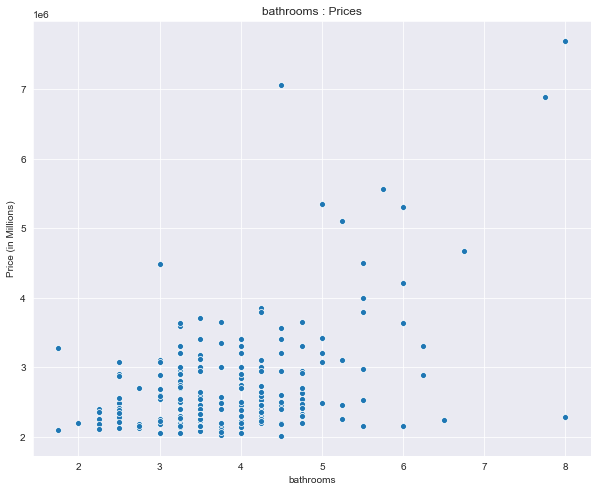

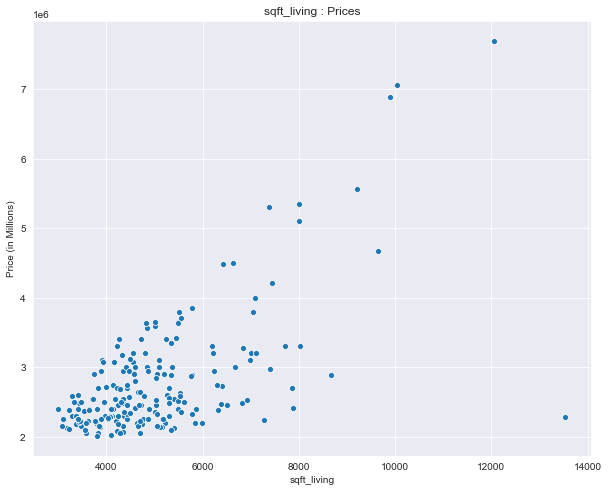

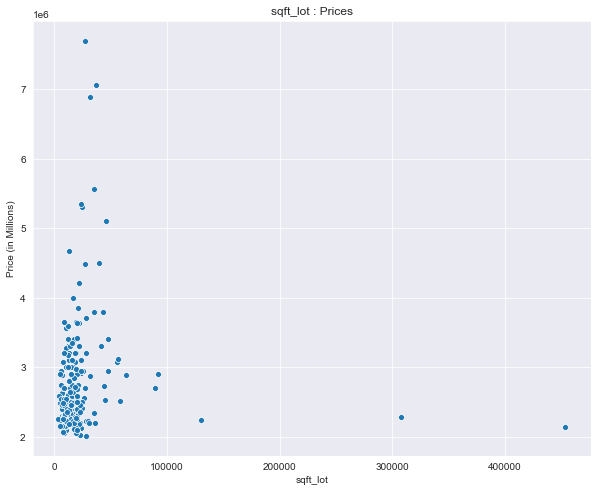

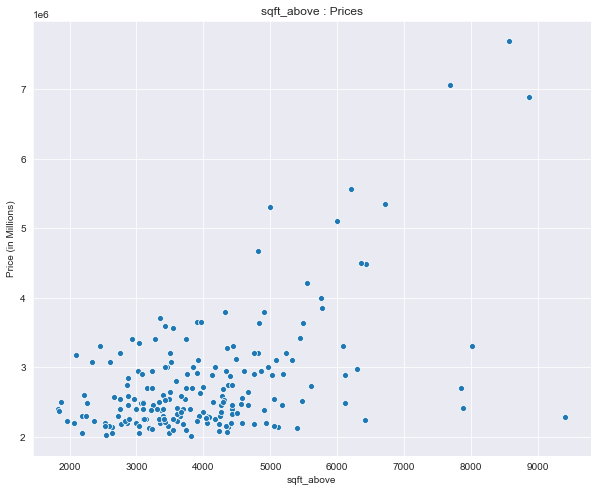

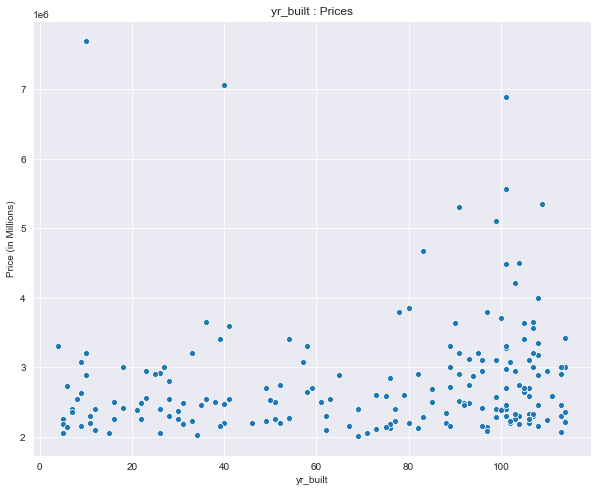

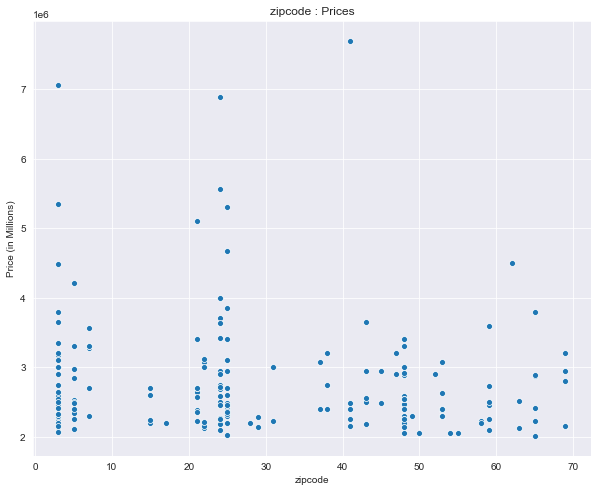

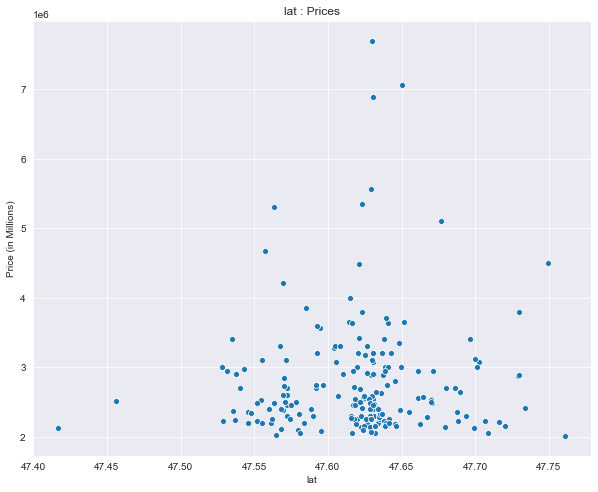

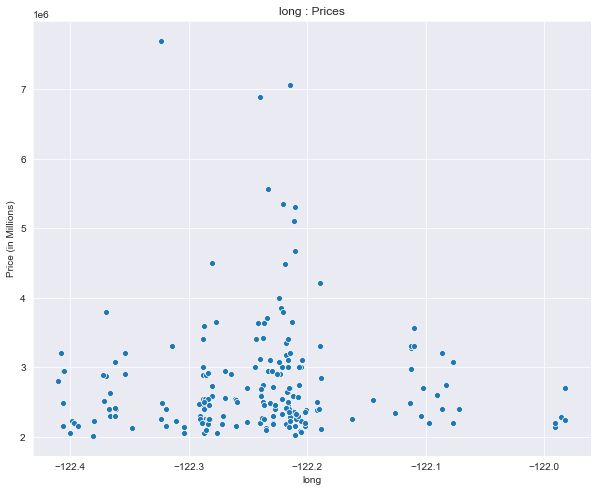

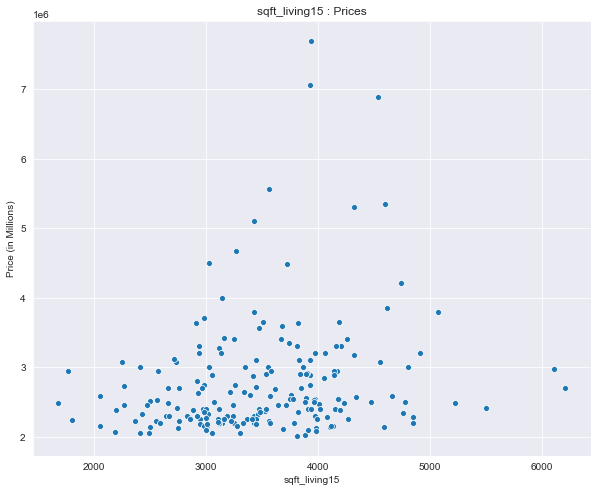

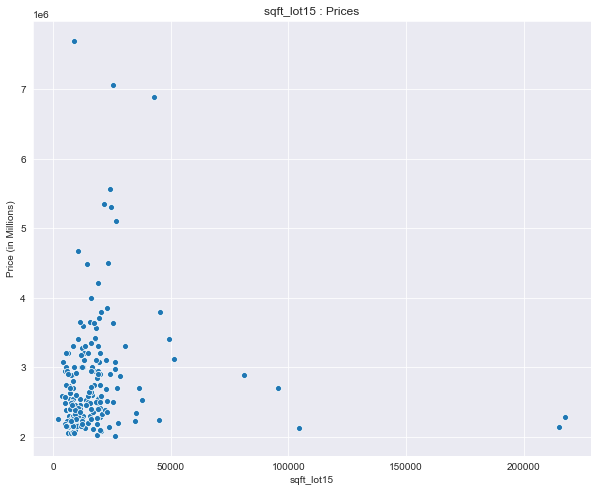

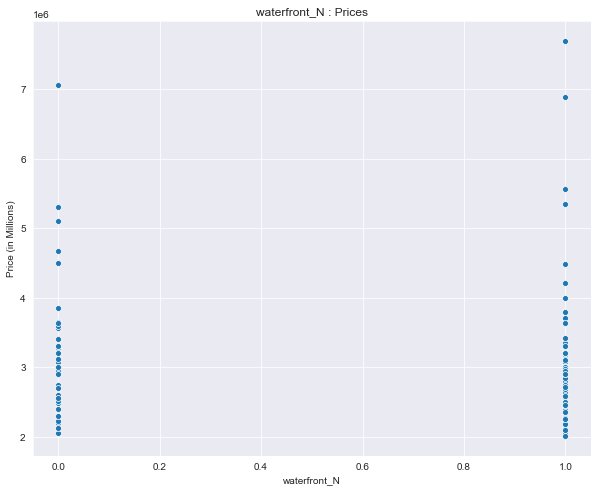

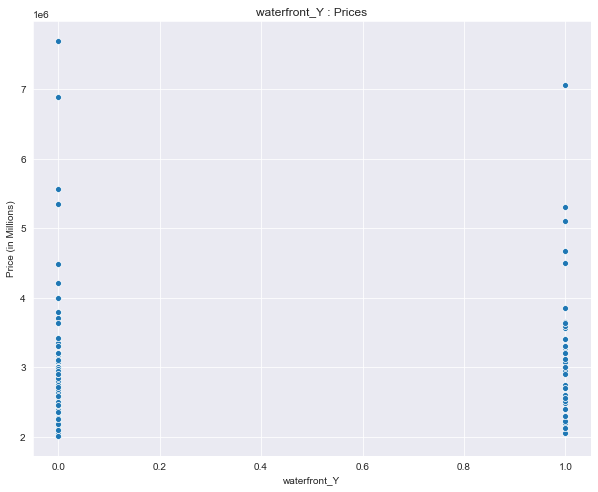

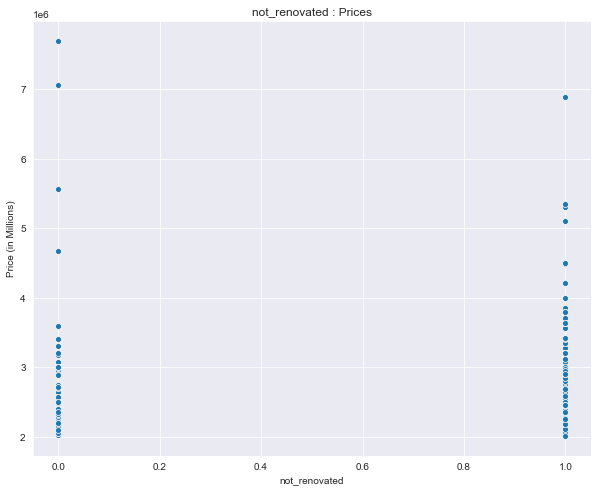

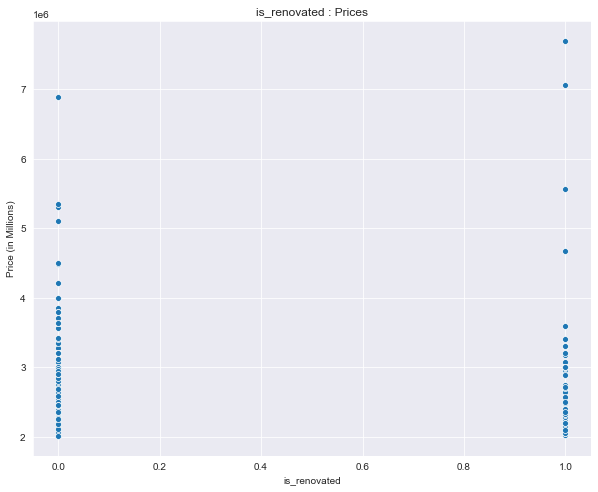

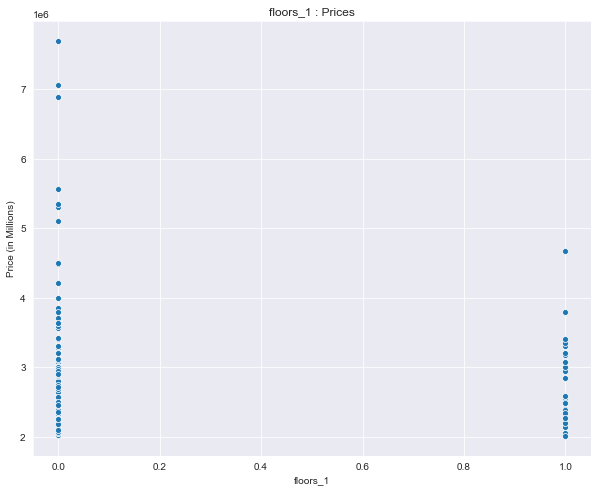

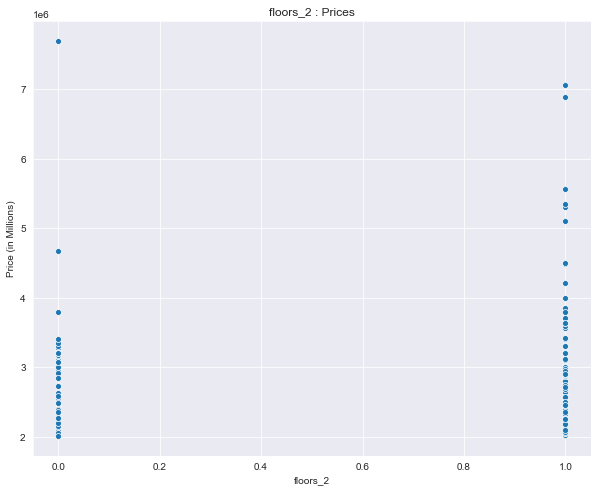

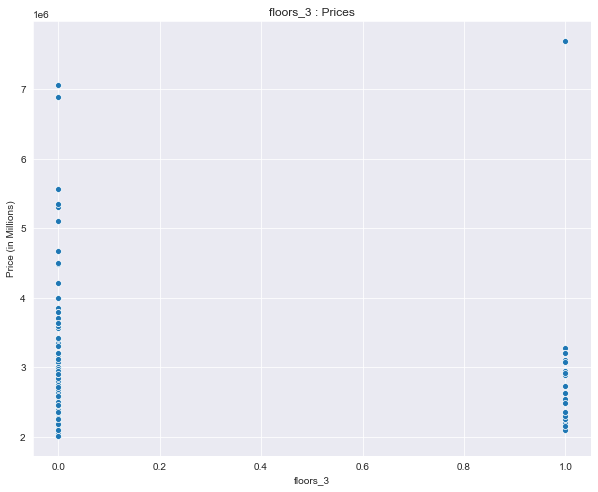

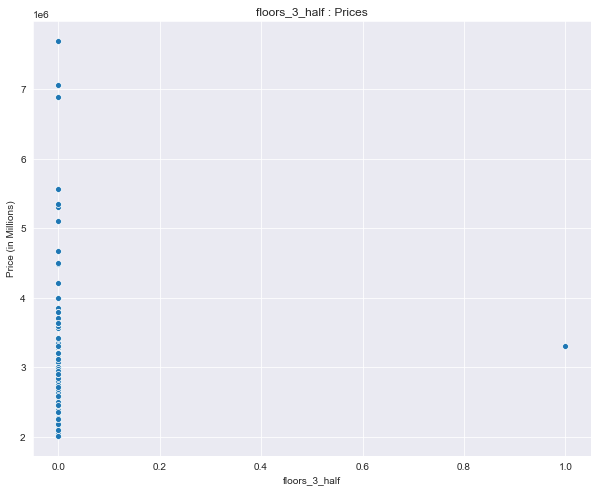

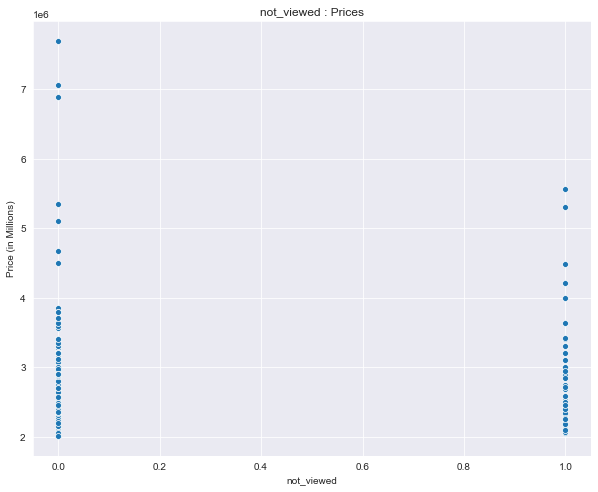

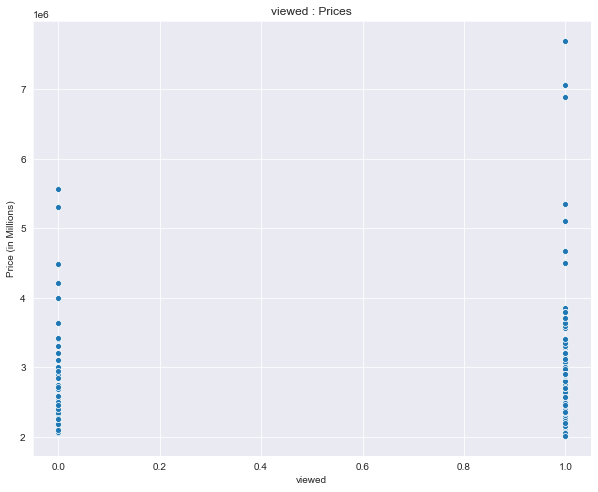

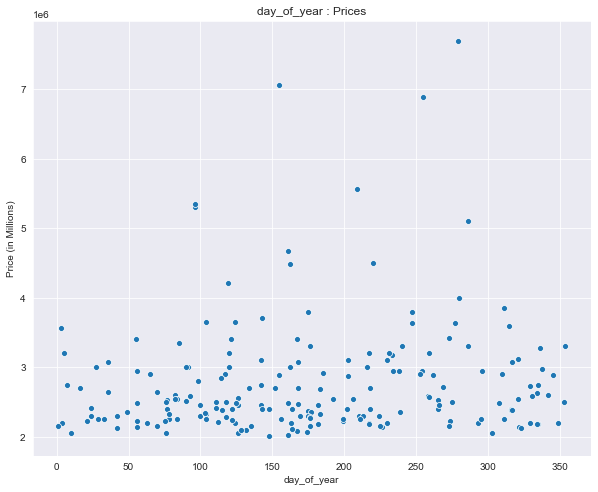

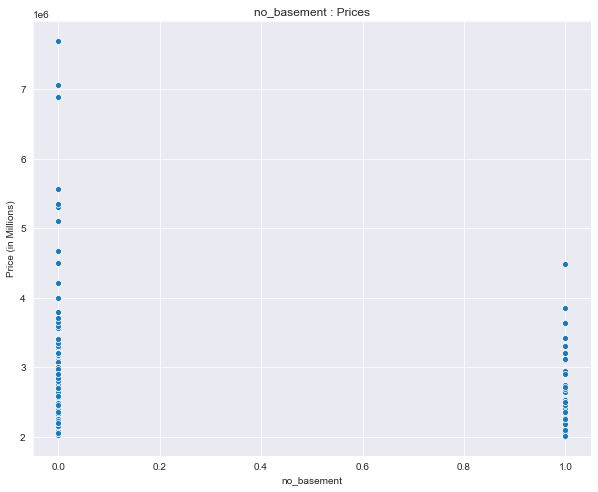

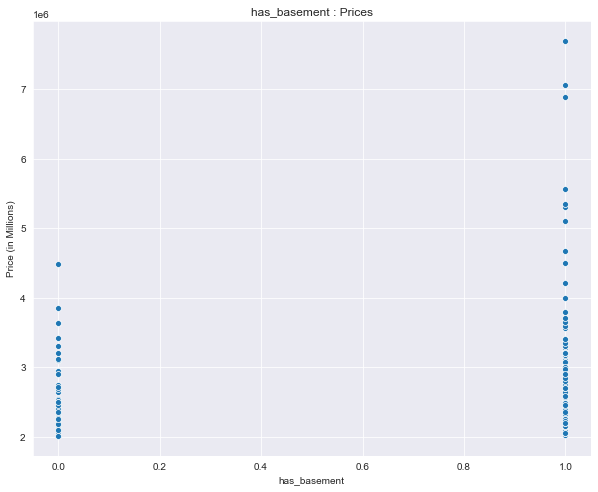

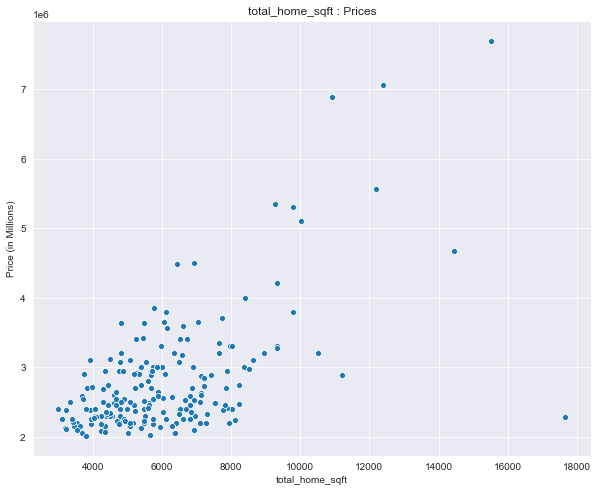

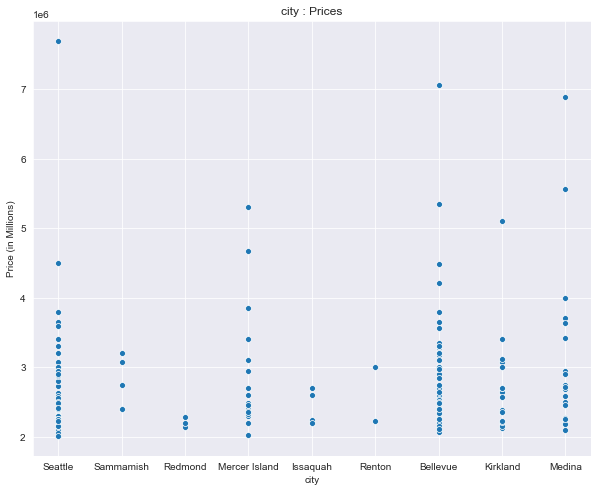

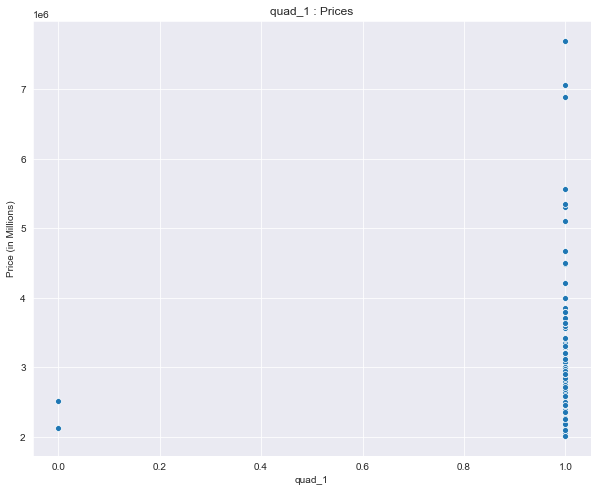

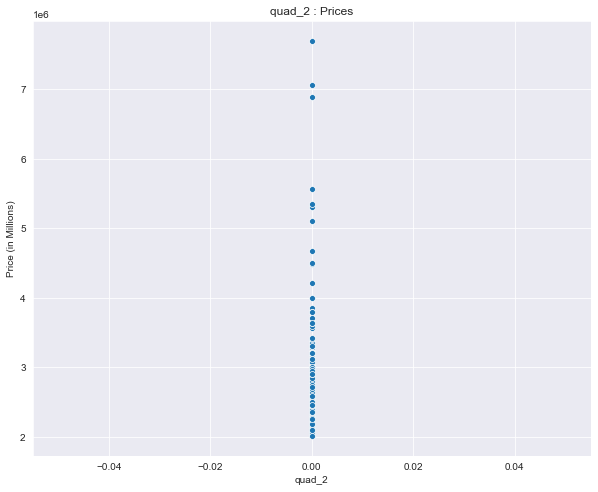

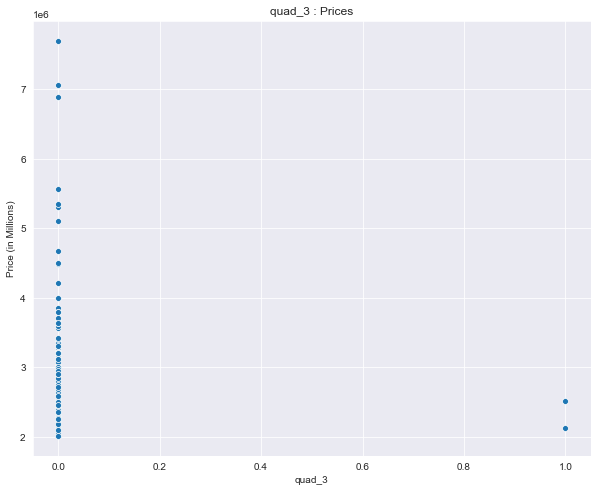

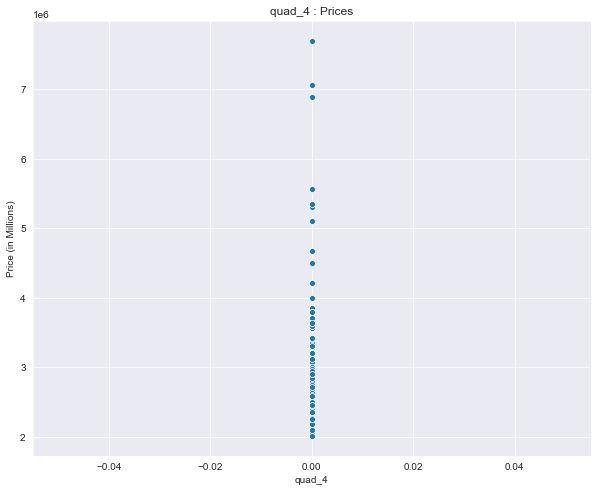

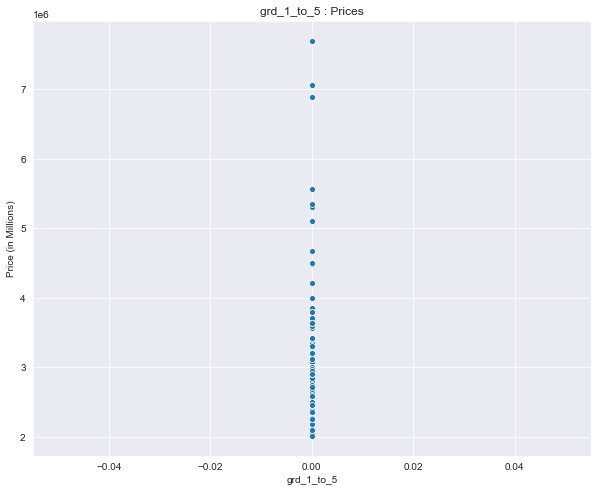

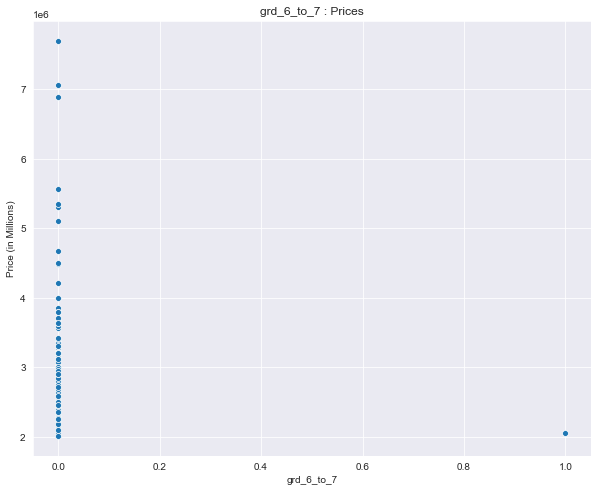

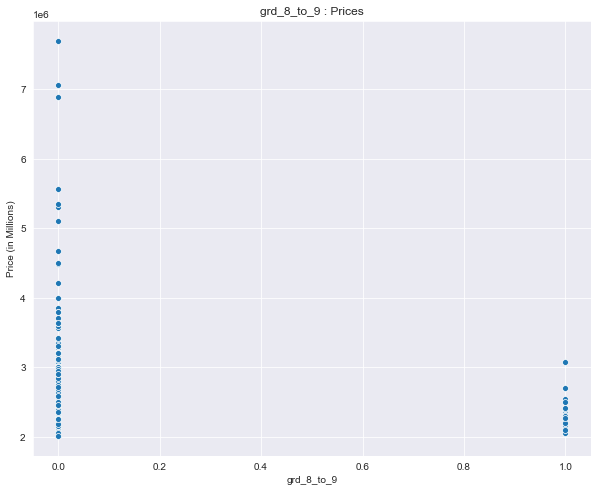

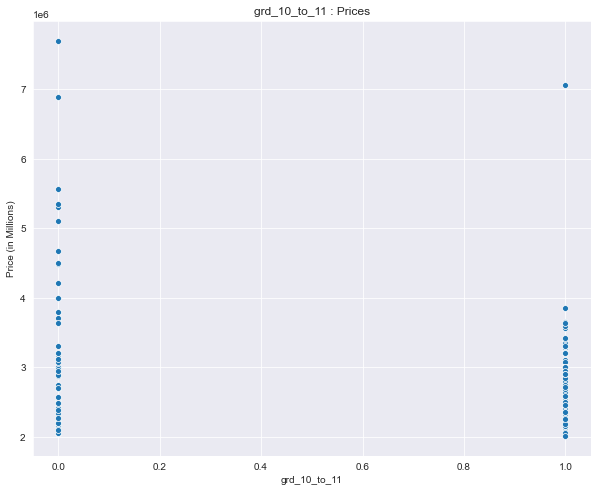

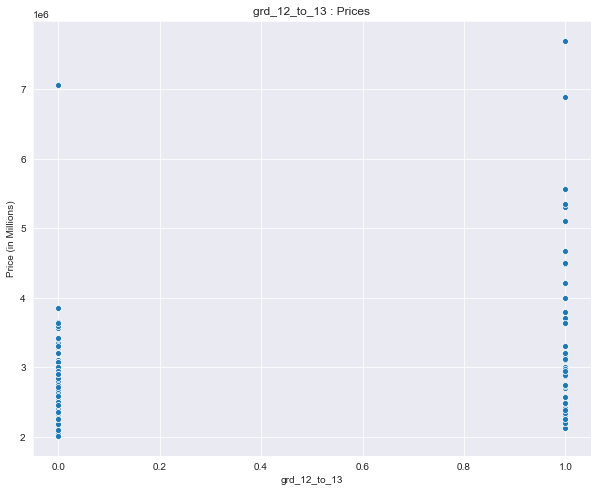

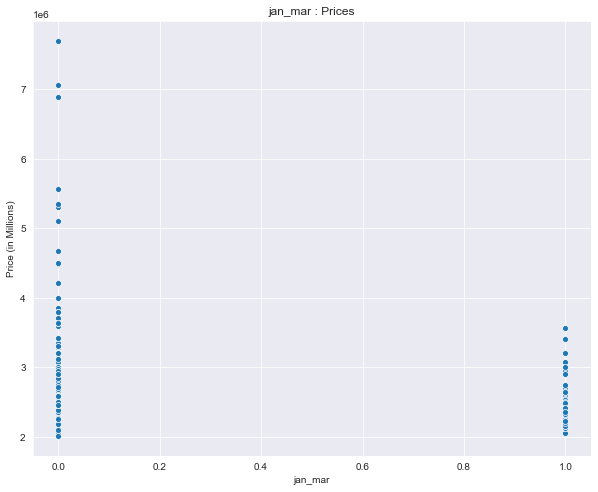

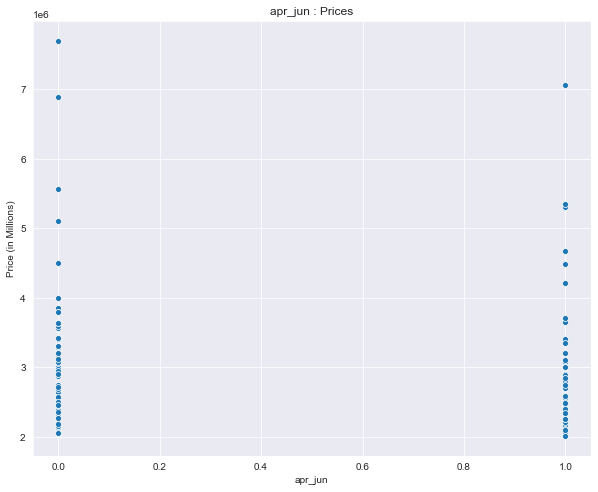

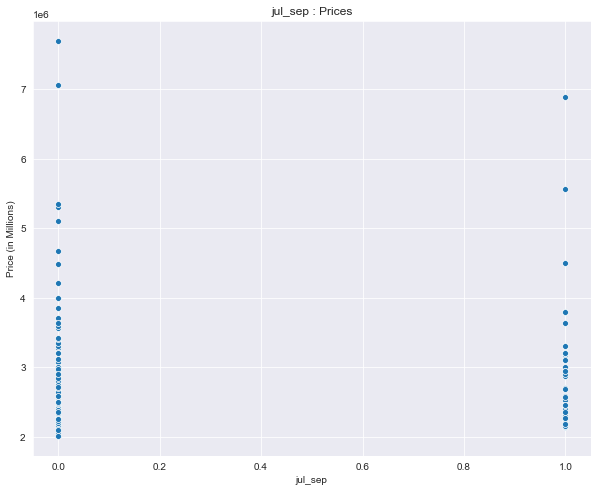

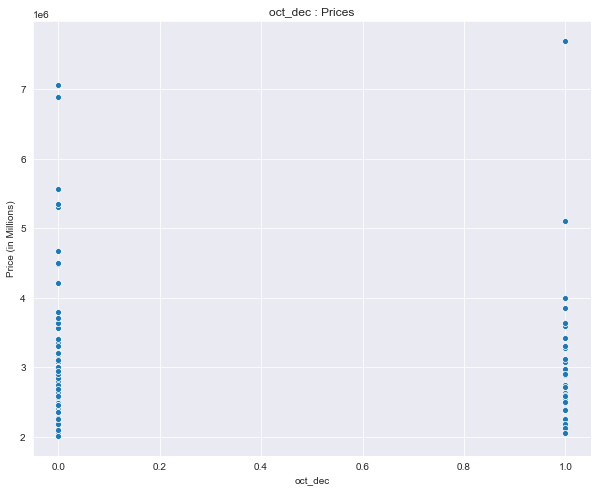

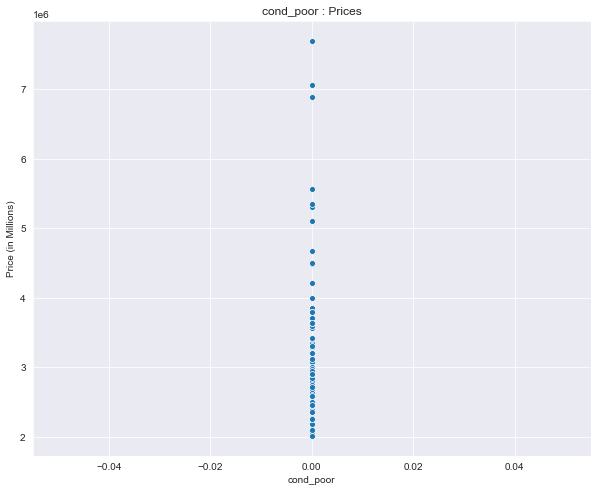

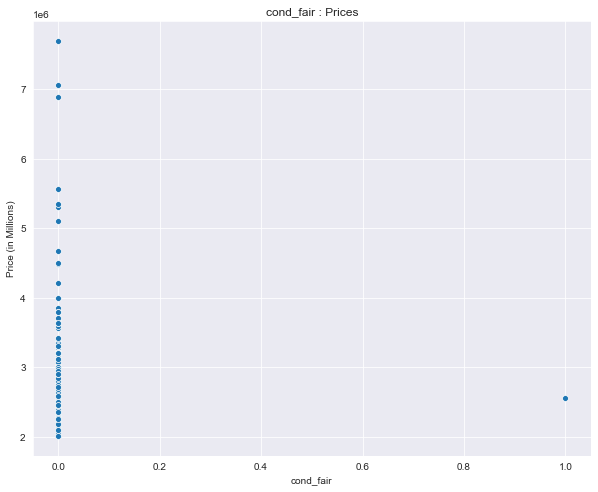

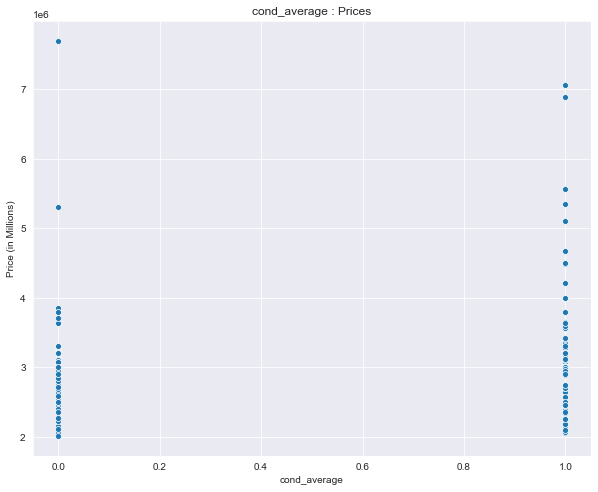

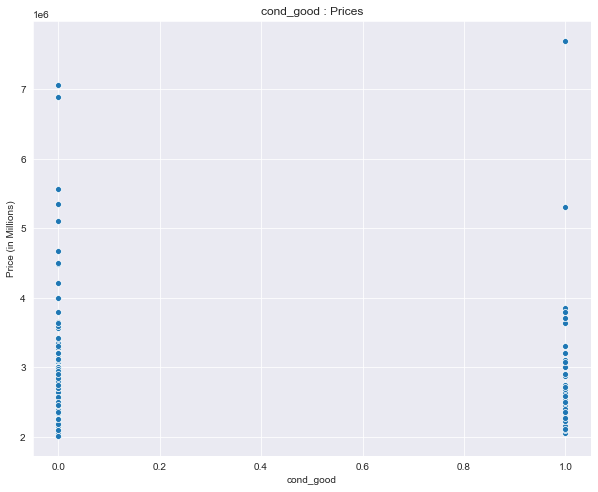

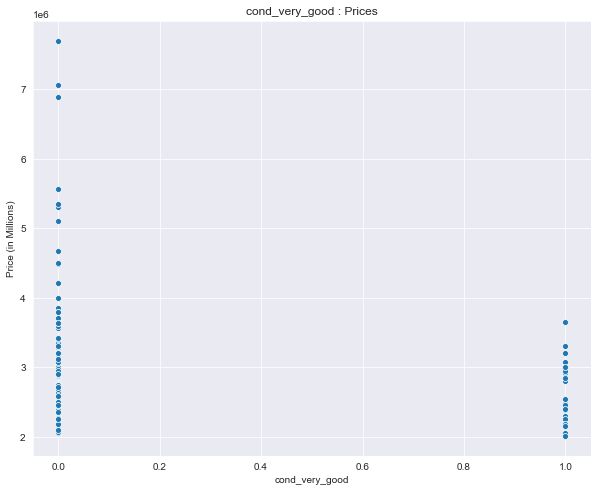

In [34]:
cols = above_2mil.drop('price', axis=1)

for col in cols.columns:
# checking normality of 'price'
    fig = plt.figure(figsize=(10, 8))
    sns.scatterplot(x=cols[col], y=above_2mil['price'])
    plt.title(f'{col} : Prices')
    plt.xlabel(f'{col}')
    plt.ylabel(f'Price (in Millions)')
    plt.show();


The outliers in 'prices' are also outliers in other categories and we've learned that homes above $2 million are not in grades lower than 6, have a poor condition, or are located in Quadrant 2. 

In [35]:
# using z-score to remove outliers
z = np.abs(stats.zscore(df.price))
threshold = 3
df2 = df[(z < threshold)]

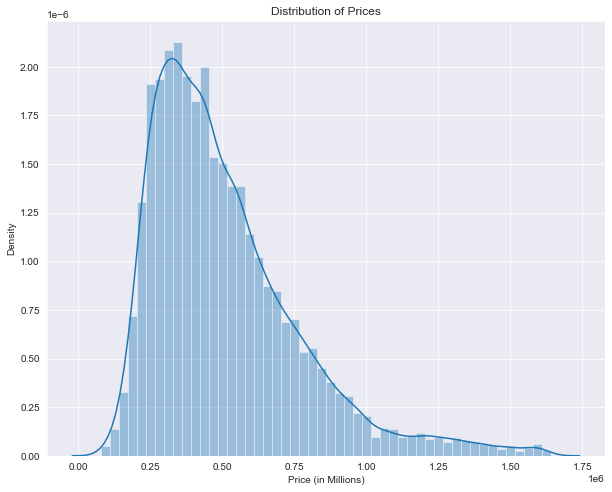

In [36]:
# checking normality of 'price'
fig = plt.figure(figsize=(10, 8))
sns.distplot(df2['price'])
plt.title('Distribution of Prices')
plt.xlabel('Price (in Millions)')
plt.ylabel('Density')
plt.show();

Still skewed, but much more normal.

In [47]:
# amount of rows removed
removed = len(df.index) - len(df2.index)
remaining = len(df2.index)
percentage = round(removed/remaining*100, 2)


print(f'Number of rows removed: {removed}')
print(f'Remaining rows: {remaining}')
print(f'Percentage removed: {percentage}%')

Number of rows removed: 404
Remaining rows: 21016
Percentage removed: 1.92%


In [48]:
cols = list(df2.columns)
cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_N',
 'waterfront_Y',
 'not_renovated',
 'is_renovated',
 'floors_1',
 'floors_2',
 'floors_3',
 'floors_3_half',
 'not_viewed',
 'viewed',
 'day_of_year',
 'no_basement',
 'has_basement',
 'total_home_sqft',
 'city',
 'quad_1',
 'quad_2',
 'quad_3',
 'quad_4',
 'grd_1_to_5',
 'grd_6_to_7',
 'grd_8_to_9',
 'grd_10_to_11',
 'grd_12_to_13',
 'jan_mar',
 'apr_jun',
 'jul_sep',
 'oct_dec',
 'cond_poor',
 'cond_fair',
 'cond_average',
 'cond_good',
 'cond_very_good']

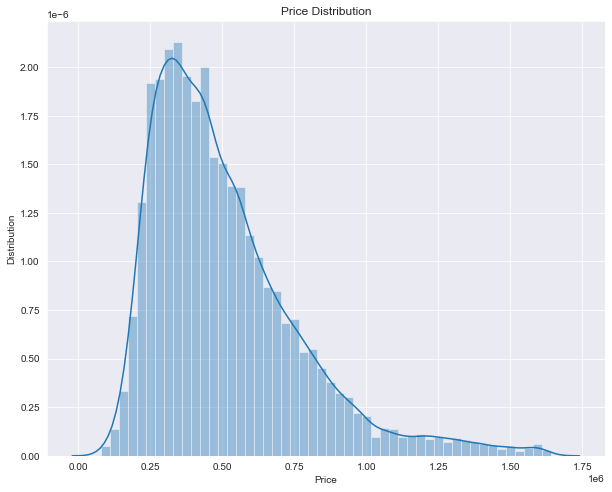

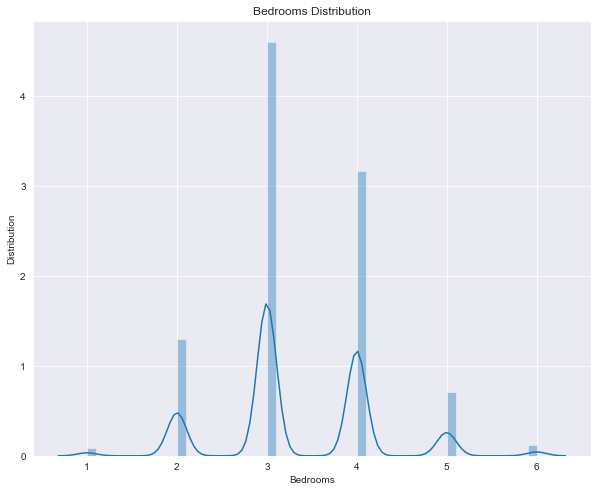

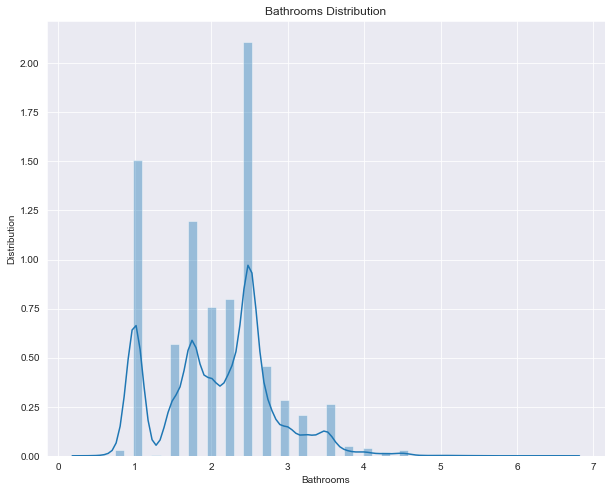

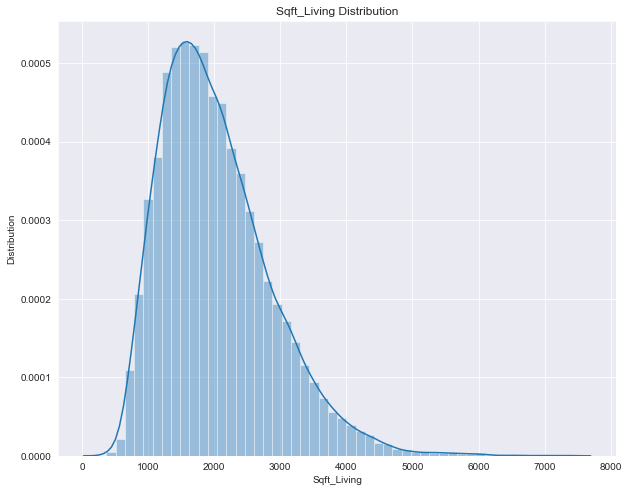

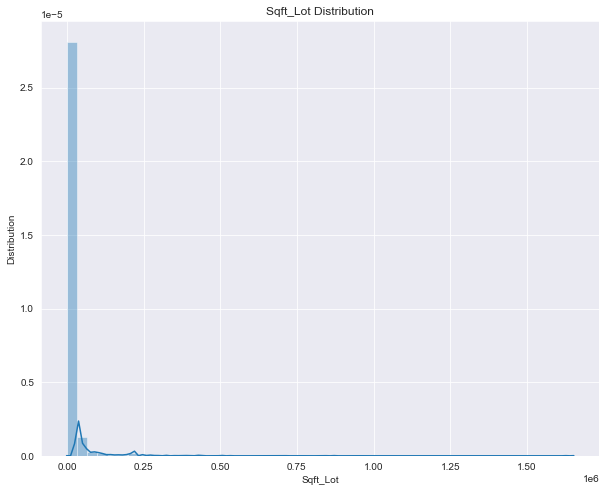

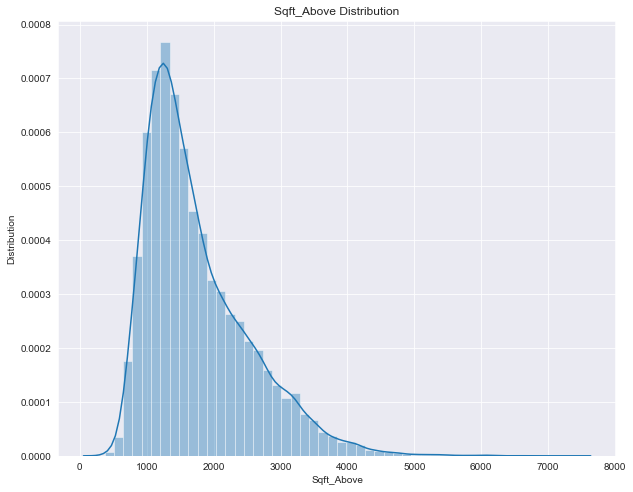

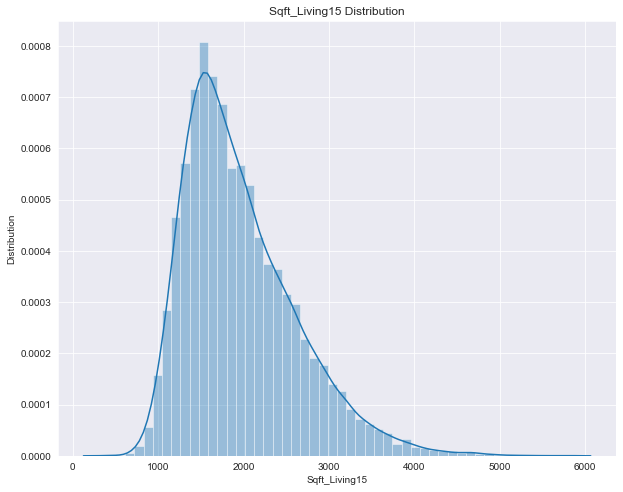

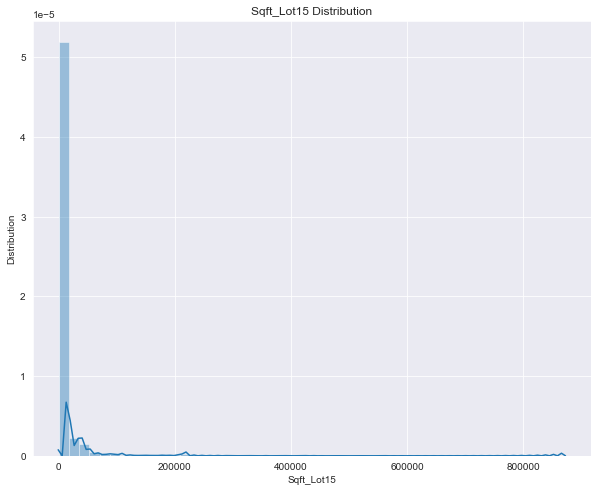

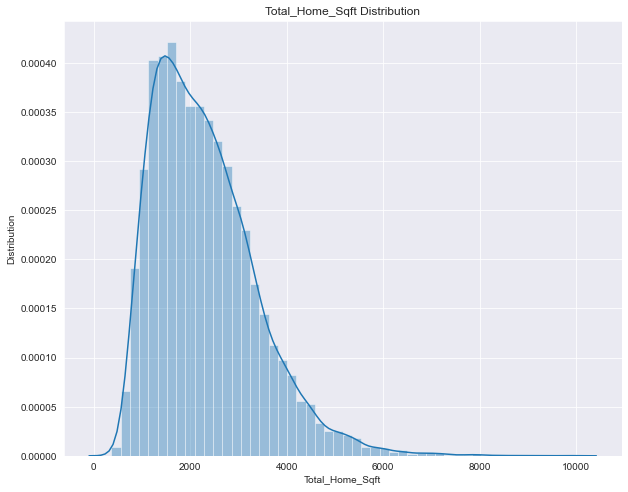

In [67]:
# Continuous variables
conts = ['price','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 
         'sqft_above', 'sqft_living15', 'sqft_lot15', 
         'total_home_sqft']
cont_feats = df2[conts]

for col in cont_feats.columns:
# checking normality of 'price'
    fig = plt.figure(figsize=(10, 8))
    sns.distplot(cont_feats[col])
    plt.title(f'{col.title()} Distribution')
    plt.xlabel(f'{col.title()}')
    plt.ylabel(f'Distribution')
    plt.show();

In [58]:
# Checking Bedrooms
beds = cont_feats[cont_feats['bedrooms'] > 10]
beds

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,total_home_sqft
5368,640000.0,33,1.75,1620,6000,1040,47,42,47.6878,-122.331,1330,4700,2200.0
20367,520000.0,11,3.00,3000,4960,2400,18,44,47.5560,-122.363,1420,4960,3600.0


In [64]:
# Probability of a 33 bed, 1.75 bath home is unlikely; removing outliers
z = np.abs(stats.zscore(df2.bedrooms))
threshold = 3
df2 = df2[(z < threshold)]

In [65]:
len(df2.index)

20964

In [75]:
# Bathrooms
bath = df2[df2['bathrooms'] >= 5]
bath



,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
1625,1280000.0,6,5.25,6160,27490,4040,107,37,47.6094,-122.023,...,0,0,0,1,0,0,0,1,0,0
2065,740000.0,5,5.00,5774,31675,4490,84,2,47.3466,-122.323,...,0,0,1,0,0,0,0,1,0,0
3232,1180000.0,5,5.00,3960,94089,3960,98,23,47.3800,-122.011,...,0,0,0,0,1,0,0,1,0,0
4514,643500.0,6,5.25,3600,3960,2400,71,56,47.5656,-122.372,...,0,0,0,0,1,0,0,1,0,0
5722,300000.0,6,5.25,2860,5682,2860,78,1,47.3030,-122.221,...,0,0,1,0,0,0,0,1,0,0
5770,343000.0,6,5.00,2732,7655,2732,109,1,47.3045,-122.211,...,0,0,0,0,1,0,0,1,0,0
7115,480000.0,6,5.00,3028,18055,3028,105,18,47.3651,-122.197,...,0,1,0,0,0,0,0,1,0,0
9205,1500000.0,4,5.50,6550,217374,5400,106,32,47.4302,-122.095,...,0,0,0,1,0,0,0,1,0,0
11949,784500.0,4,5.00,5820,13906,3750,93,26,47.3814,-122.164,...,0,1,0,0,0,0,0,1,0,0
12370,1320000.0,4,5.25,6110,10369,6110,105,33,47.5285,-122.135,...,0,0,0,0,1,0,0,1,0,0


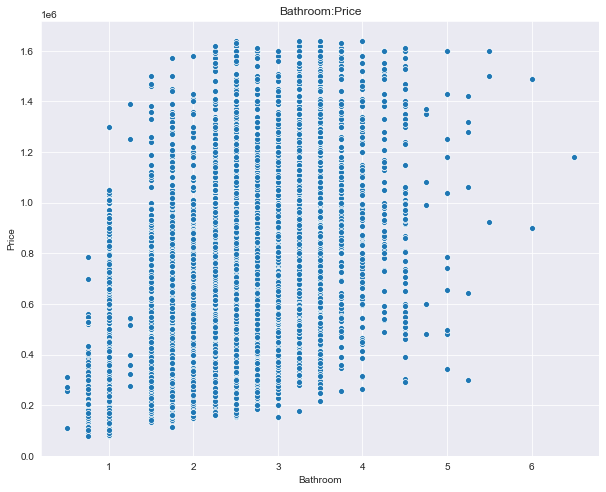

In [79]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x=df2['bathrooms'], y=df2['price'])
plt.title('Bathroom:Price')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show();

In [81]:
df2.bathrooms.unique()

2.50    5308
1.00    3793
1.75    3015
2.25    2007
2.00    1908
1.50    1427
2.75    1156
3.00     711
3.50     670
3.25     517
3.75     123
4.00      97
0.75      70
4.50      69
4.25      51
5.00      11
1.25       9
4.75       6
5.25       6
0.50       4
5.50       3
6.00       2
6.50       1
Name: bathrooms, dtype: int64

In [83]:
# Checking houses with only a half-bathroom
bath = df2[df2['bathrooms'] == 0.50]
bath

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
4619,255000.0,1,0.5,880,1642,500,10,56,47.5732,-122.372,...,0,0,0,1,0,0,0,1,0,0
6747,312500.0,4,0.5,2300,5570,2300,96,40,47.3285,-122.168,...,0,0,0,0,1,0,0,1,0,0
15477,109000.0,2,0.5,580,6900,580,41,52,47.5135,-122.262,...,0,1,0,0,0,0,0,1,0,0
19309,273000.0,2,0.5,1180,7750,590,45,62,47.7690,-122.316,...,0,0,0,0,1,0,0,0,1,0


It doesn't make sense for a 4 bedroom home to not a single full-bath, let alone ANY home not having a full-bathroom. Binning bathrooms.

Text(0, 0.5, 'value counts')

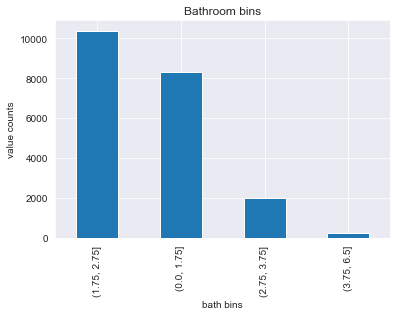

In [84]:
bins = [0, 1.75, 2.75, 3.75, 6.5]
bin_bath = pd.cut(df2['bathrooms'], bins)
bin_bath = bin_bath.cat.as_ordered()

bin_bath.value_counts().plot(kind='bar')
plt.title('Bathroom bins')
plt.xlabel('bath bins')
plt.ylabel('value counts')

In [86]:
# now to afix this to our data frame and create dummies

# Creating dummies
gbin_dummies = pd.get_dummies(bin_bath, prefix='bath') 

# again, keeping first column for now

df2 = pd.concat([df2, gbin_dummies], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 21412
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20964 non-null  float64
 1   bedrooms           20964 non-null  int64  
 2   bathrooms          20964 non-null  float64
 3   sqft_living        20964 non-null  int64  
 4   sqft_lot           20964 non-null  int64  
 5   sqft_above         20964 non-null  int64  
 6   yr_built           20964 non-null  int64  
 7   zipcode            20964 non-null  int64  
 8   lat                20964 non-null  float64
 9   long               20964 non-null  float64
 10  sqft_living15      20964 non-null  int64  
 11  sqft_lot15         20964 non-null  int64  
 12  waterfront_N       20964 non-null  int64  
 13  waterfront_Y       20964 non-null  int64  
 14  not_renovated      20964 non-null  int64  
 15  is_renovated       20964 non-null  int64  
 16  floors_1           209

In [87]:
# renaming columns
df2 = df2.rename(columns={'bath_(0.0, 1.75]':'1_bath', 
                          'bath_(1.75, 2.75]':'2_bath', 
                           'bath_(2.75, 3.75]':'3_bath', 
                          'bath_(3.75, 6.5]':'4_plus_bath''})

df2['1_bath'] = df2['1_bath'].cat.codes
df2['2_bath'] = df2['2_bath'].cat.codes
df2['3_bath'] = df2['3_bath'].cat.codes
df2['4_plus_bath'] = df2['4_plus_bath'].cat.codes
                          
df2.info()

SyntaxError: EOL while scanning string literal (<ipython-input-87-119a112de039>, line 5)